In astrophysics, a polytrope refers to a solution of the Lane–Emden equation in which the pressure depends upon the density in the form

${\displaystyle P=K\rho ^{(n+1)/n}=K\rho ^{1+1/n}}$ 

where P is pressure, ρ is density and K is a constant of proportionality. The constant $n$ is known as the polytropic index; note however that the polytropic index has an alternative definition as with $n$ as the exponent.

A polytropic process is a thermodynamic process that obeys the relation:

${\displaystyle pV^{n}=C}$

where p is the pressure, V is volumes, n is the polytropic index, and C is a constant. The polytropic process equation describes expansion and compression processes which include heat transfer.

# Polytrope EOS

In [62]:
# Constants
G= 6.67430*(10**(-8))
c= 2.99792458*10**10
pi=3.14

In [104]:
# Instead of r=0, we are starting at r=r0. h is step size
r0=10
h=100

In [64]:
# Polytropic EOS P=K*rho^gamma where gamma = (n+1)/n  and n = 3/2 ( Hydrogen gas, monoatomic)

k= 5.38*(10**9)
gamma= 1.667

In [65]:
# Defining the central density
rho_c=1*10**15

In [103]:
# Central pressure

p0= k*(rho_c)**gamma

p0

5.442297463918261e+34

In [67]:
# An approximate value of mass to start with at r0
m0=(4/3)*pi*(r0**3)*rho_c
m0

4.186666666666667e+18

In [68]:
m=m0

In [69]:
# the dm/dr function

def dmdr(r, m):
    return 4*pi*(r**2)*rho(r,p)

In [105]:
# rk4 integrator for dm/dr equation

def mrk4(r, m, h):

  for i in range(1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dmdr(r, m)
        k2 = h * dmdr(r + 0.5 * h, m + 0.5 * k1)
        k3 = h * dmdr(r + 0.5 * h, m + 0.5 * k2)
        k4 = h * dmdr(r + h, m + k3)

        # Update next value of y
        mnew = m + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        m=mnew

  return mnew

In [107]:
# to suppy for dm/dr the value of rho, at first step and other steps
def rho(r,p):

  if(r==10):
    rho=rho_c

  else:
    rho=(p/k)**(1.00/gamma)

  return rho


In [108]:
# dp/dr equation

def dpdr(r, p):
  term1= -((G*m)/(r**2))
  term2= rho(r,p)
  term3= 1+(p/(rho(r,p)*(c**2)))
  term4= 1+(((4*pi*(r**3)*p))/(m*(c**2)))
  term5= 1-((2*G*m)/(r*(c**2)))
  return (term1*term2*term3*term4)/term5




nan

In [109]:
# rk4 integrator for dp/dr equation. Once p_new is found, it finds rho_new and calls dm/dr rk4 to get m_new

number=1000 # to run over a number of times




def rk4(r0, p0, h):
    r=r0
    global p
    p=p0

    global m

    for i in range (1, number):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dpdr(r, p)
        k2 = h * dpdr(r + 0.5 * 100, p + 0.5 * k1)
        k3 = h * dpdr(r + 0.5 * 100, p + 0.5 * k2)
        k4 = h * dpdr(r + 100, p + k3)

        print(k1,k2,k3,k4,'stop')

        # Update next value of y
        pnew = p + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        p=pnew

        rho_new=(pnew/k)**(1.0/gamma)

        mnew=mrk4(r,m,h)

        m=mnew

        if(pnew < 0.00):           # to exit the computation when surface of star is encountered
           break



        # # to print
        f=open('output_polytrope.txt','a')
        print(rnew,rho_new,pnew,mnew)
        f.write("{} {} {} {} \n".format(rnew,rho_new,pnew,mnew))
        f.close()


    return pnew

In [ ]:
# delete the output file everytime you run so that it don't append below old data
h = 100
rk4(r0,p0,h)           # calling the rk4 for dp/dr

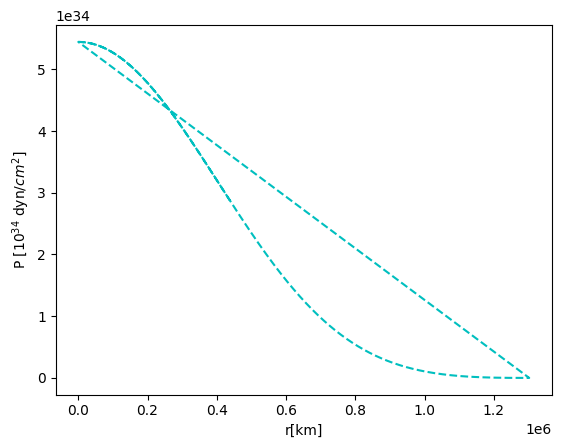

In [111]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output_polytrope.txt')


x = data[:, 0]
y = data[:, 2]
plt.xlabel('r[km]')
plt.ylabel('P [$10^{34}$ dyn/$cm^{2}$]')
plt.plot(x, y,'c--')
plt.show()

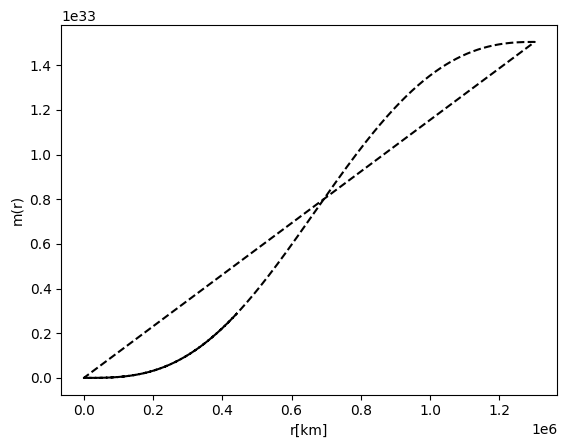

In [113]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output_polytrope.txt')


x = data[:, 0]
y = data[:, 3]
plt.xlabel('r[km]')
plt.ylabel('m(r)')         # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'k--')
plt.show()

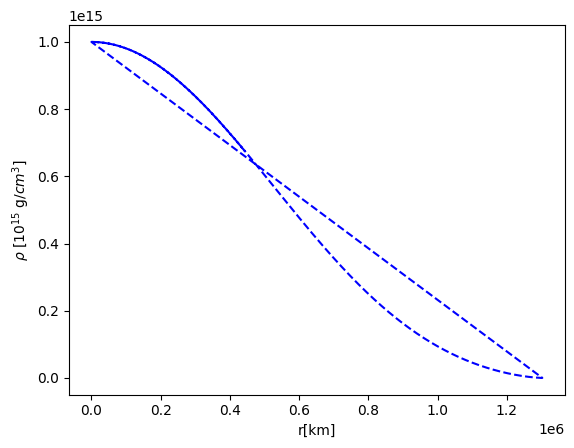

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output_polytrope.txt')


x = data[:, 0]
y = data[:, 1]
plt.xlabel('r[km]')
plt.ylabel('$ \\rho $ [$10^{15}$ g/$cm^{3}$]')
plt.plot(x, y,'b--')
plt.show()